# 方差分析概述

## 因素与数据组织
* 因素
    * 因素, 也叫因子, 是将全样本划分成若干个样本的**分类变量**(特征)
    * 一个因素有m个取值(水平), 就将全样本划分成m个样本. 例如, "性别"因素有2个取值, 就将全样本划分成2个样本; "省籍"因素有31个取值, 就将全样本划分成31个样本
    * 多个因素(例如, "性别""省籍"2个因素), 就将全样本划分成2*31=62个样本
* 因素的种类
    * 独立测量因素(组间因素, 个体外因素, between-subjects): 将全样本划分成**m个独立样本**的因素
    * 重复测量因素(组内因素, 个体内因素, within-subjects): 将全样本划分成**m个配对样本**的因素, 每个被试(个体)重复测量m次
* 数据组织
    * 宽数据: 每个样本保存为一列, m个样本则对应m列(不能更改重复测量数据的行对应关系)
    * 长数据: m个样本保存在同一列, 再在新列标明对应的因素(样本类别)、**对应个体**(重复测量数据的必须信息, 需要个体信息进行配对)

In [1]:
import pandas as pd
data = pd.read_excel('7 多个样本均值推断：方差分析.xlsx', sheet_name='单因素独立测量-宽数据')
data  # 使用宽数据

,样本1,样本2,样本3
0,0,4,1
1,1,3,2
2,3,6,2
3,1,3,0
4,0,4,0


## 方差分析的前提: 总体的正态性
* 各样本对应总体服从正态分布, 是方差分析的前提; 方差分析前需要对数据进行正态性检验
* 各种正态性检验的原假设： 样本对应总体服从正态分布
* 样本对应总体的正态性不满足时
    * 需每组样本容量≥30(样本均值近似服从正态分布)
    * 使用非参数检验方法(Kruskal-Wallis检验, Friedman检验)替代方差分析

In [2]:
# 正态性检验: 方法1
from scipy import stats
for i in range(3):
    result = stats.shapiro(data.iloc[:,i])  # 对索引i列进行正态性检验
    print('样本%s对应总体的正态性检验:'%(i+1), result)    

样本1对应总体的正态性检验: ShapiroResult(statistic=0.8327444791793823, pvalue=0.1458437591791153)
样本2对应总体的正态性检验: ShapiroResult(statistic=0.8327445983886719, pvalue=0.14584408700466156)
样本3对应总体的正态性检验: ShapiroResult(statistic=0.8208345174789429, pvalue=0.11850956827402115)


In [3]:
# 正态性检验: 方法2
from scipy import stats
stats.normaltest(a=data, axis=0)   
# 对每一列进行正态性检验, 但对数据量有要求, 否则会报错

ValueError: skewtest is not valid with less than 8 samples; 5 samples were given.

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
temp = pd.DataFrame(np.random.normal(loc=0,scale=1,size=(100,3)))  # 产生100行*3列的标准正态分布随机数
stats.normaltest(a=temp, axis=0)   # 对每一列进行正态性检验, 但对数据量有要求

NormaltestResult(statistic=array([0.38143129, 2.30236509, 1.38878257]), pvalue=array([0.82636754, 0.31626255, 0.49937833]))

## 方差分析的前提: 总体的方差齐
* 各样本对应总体的方差齐, 是方差分析的前提; 方差分析前需要对数据进行方差齐性检验
* 原理: 参见上一章
* 方差齐检验的原假设： 各样本对应总体的方差相等
* 总体方差不齐时, 可使用非参数检验方法(Kruskal-Wallis检验,Friedman检验)替代方差分析

In [6]:
from scipy import stats
stats.levene(data['样本1'],data['样本2'],data['样本3'], center='median')
# center='median' 缺省值, 基于中位数做同方差检验

LeveneResult(statistic=0.0, pvalue=1.0)

## 卡方分布与F分布

* 卡方分布
    * 服从标准正态分布的k个独立变量的平方和, 服从k个自由度的卡方分布, 记为$x^2(k)$
    * 卡方分布的概率密度函数
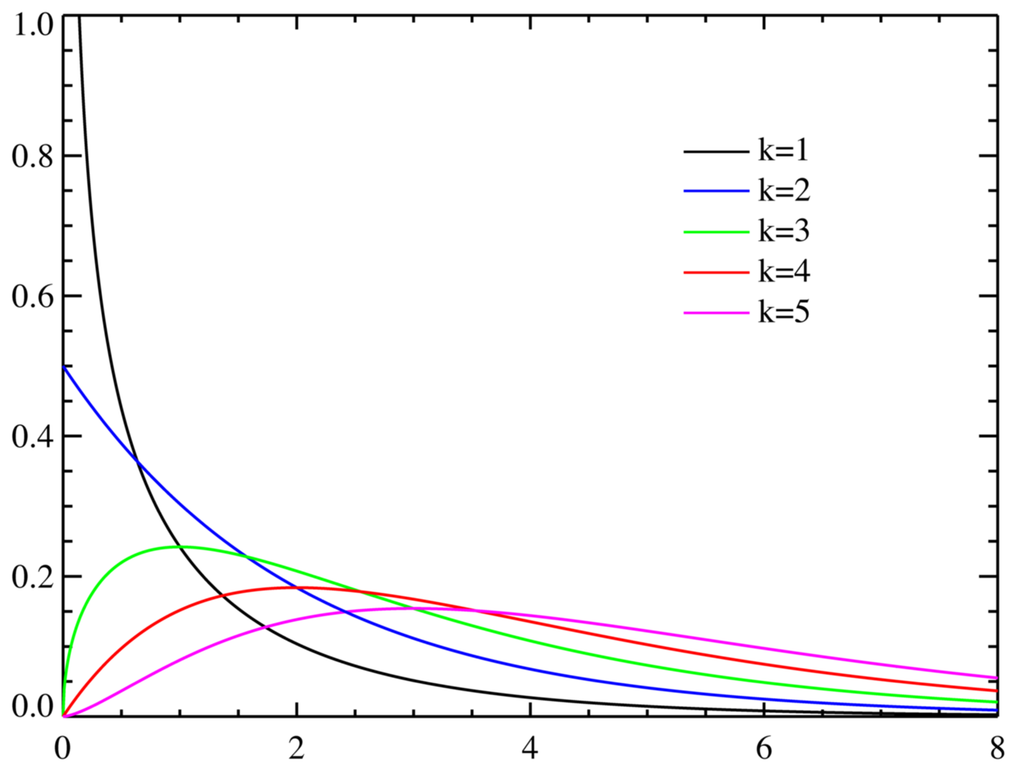

* F分布
    * 服从卡方分布的2个独立变量X1、X2的比值(除以对应自由度d1、d2后) $\frac{X1/d1}{X2/d2}$, 服从自由度(d1,d2)的F分布
    * F(d1,d2)分布的概率密度函数
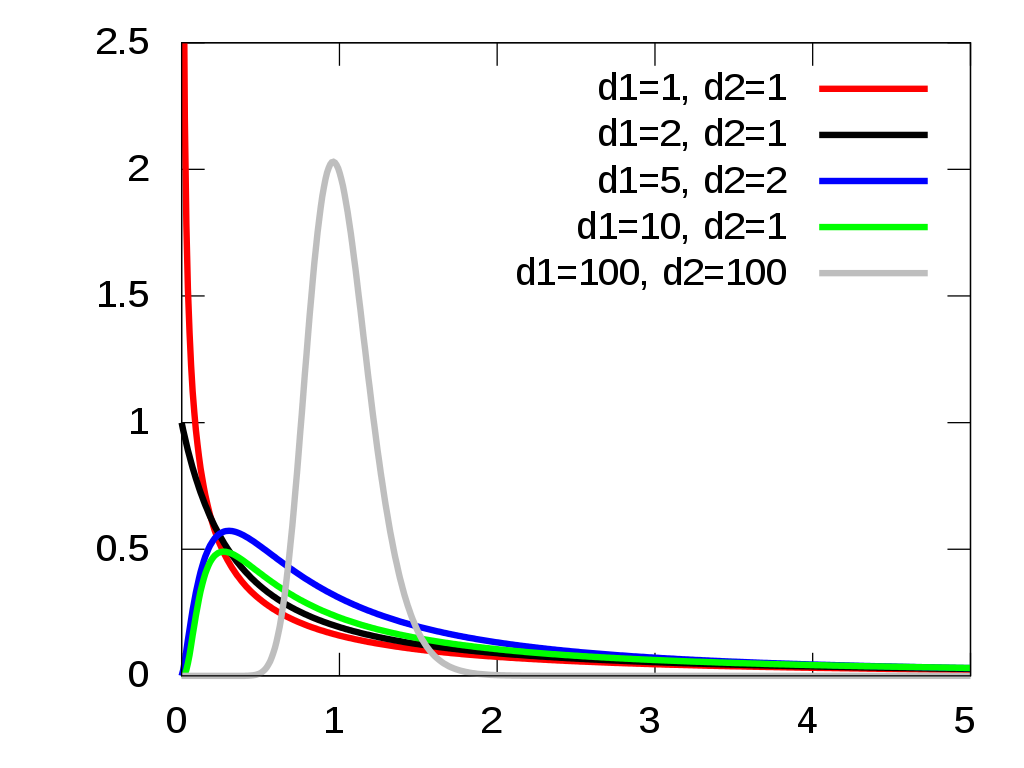

# 单因素独立测量(多个独立样本)的方差分析

## 基本原理
* 各组样本对应的各组总体均值相等吗?
* 原假设H0: 各组样本对应的各组总体均值, 全部相等
* 备择假设H1: 各组样本对应的各组总体均值, 至少有一组不相等
* 计算统计量   $$ F分数=\frac{组间的方差MS}{组内的方差MS} =\frac{组间的离差平方和SS\ /\ 组间的自由度df1}{组内的离差平方和SS\ /\ 组内的自由度df2} $$
* F分数服从F分布(df1,df2)
    * 若F分数处在依据显著水平α(如0.05)设置的拒绝域(在右尾), 则拒绝原假设
* 可根据所得样本F分数计算p值
    * p值: 原假设正确时, 统计量高于所得样本F分数的概率, 右尾)
    * 若p值<显著水平α(如0.05), 则拒绝原假设
* 参照excel文档

In [1]:
import pandas as pd
data = pd.read_excel('7 多个样本均值推断：方差分析.xlsx', sheet_name='单因素独立测量-宽数据')
data.mean()  # 各组样本的均值, 相等吗? 差异大吗?

样本1    1.0
样本2    4.0
样本3    1.0
dtype: float64

In [2]:
mean_total = data.mean().mean()  # 全样本均值: 3个样本均值的均值, 15个数据的均值
SST = ((data-mean_total)**2).sum().sum()  # 总的离差平方和: 每组对全样本均值的离差平方和、再求和
SS_group_in = ((data-data.mean())**2).sum().sum()  # 组内的离差平方和: 每组对组内均值的离差平方和、再求和  
SS_group_out = SST - SS_group_in  # 组间的离差平方和: 剩余的离差平方和
# SS_group_out = (((data.mean()-mean_total)**2)*data.count()).sum()  # 组间的离差平方和: 依据定义
# 每组均值对全样本均值的离差平方和*组内数量、再求和
F_score = (SS_group_out/2) / (SS_group_in/12)  # F分数:  组间方差/组内方差
from scipy import stats
p_value= 1- stats.f.cdf(F_score,dfn=2,dfd=12)   # F分数对应的p值
print('F分数为:%.2f, p值为:%.6f)'%(F_score,p_value))

F分数为:11.25, p值为:0.001771)


## python实现-scipy

In [5]:
from scipy import stats
stats.f_oneway(data['样本1'],data['样本2'],data['样本3'])

F_onewayResult(statistic=11.25, pvalue=0.0017708138328537343)

## python实现-statsmodels

In [7]:
import pandas as pd
data2 = pd.read_excel('7 多个样本均值推断：方差分析.xlsx', sheet_name='单因素独立测量-长数据')
data2   # 使用长数据

,得分,独立测量因素
0,0,样本1
1,1,样本1
2,3,样本1
3,1,样本1
4,0,样本1
5,4,样本2
6,3,样本2
7,6,样本2
8,3,样本2
9,4,样本2


In [8]:
# 先进行回归
import statsmodels.formula.api as smf
result = smf.ols(formula='得分 ~ 独立测量因素 ', data=data2).fit()
# 基于回归模型, 输出方差分析表
from statsmodels.stats import anova
anova.anova_lm(result)
# 方差分析可看作回归分析的特例(解释变量是分类变量的回归分析)

,df,sum_sq,mean_sq,F,PR(>F)
独立测量因素,2.0,30.0,15.000000,11.25,0.001771
Residual,12.0,16.0,1.333333,NaN,NaN


## python实现-pingouin

In [9]:
import pingouin as pg
pg.anova(data= data2,    # 指定数据源
         dv='得分',      # 指定因变量dependent variable
         between='独立测量因素',   #指定独立测量因素(1个分类变量)
        )

,Source,ddof1,ddof2,F,p-unc,np2
0,独立测量因素,2,12,11.25,0.001771,0.652174


# 单因素重复测量(多个配对样本)的方差分析

## 基本原理
* 各组样本对应的各组总体均值相等吗?
* 原假设H0: 各组样本对应的各组总体均值, 全部相等
* 备择假设H1: 各组样本对应的各组总体均值, 至少有一组不相等
* 计算统计量   $$ F分数=\frac{组间的方差MS}{误差的方差MS} =\frac{组间的离差平方和SS\ /\ 组间的自由度df1}{误差的离差平方和SS\ /\ 误差的自由度df2}=\frac{组间的离差平方和SS\ /\ 组间的自由度}{(组内的离差平方和-被试间的离差平方和)\ /\ (组内的自由度-被试间的自由度)} $$
* F分数服从F分布(df1,df2)
    * 若F分数处在依据显著水平α(如0.05)设置的拒绝域(在右尾), 则拒绝原假设
* 可根据所得样本F分数计算p值
    * p值: 原假设正确时, 统计量高于所得样本F分数的概率, 右尾)
    * 若p值<显著水平α(如0.05), 则拒绝原假设
* 参照excel文档

## python实现-statsmodels

In [10]:
import pandas as pd
data3 = pd.read_excel('7 多个样本均值推断：方差分析.xlsx', sheet_name='单因素重复测量-长数据')
data3   # 使用长数据

,被试,得分,重复测量因素
0,A,3,安慰剂
1,B,0,安慰剂
2,C,2,安慰剂
3,D,0,安慰剂
4,E,0,安慰剂
5,A,4,药物A
6,B,3,药物A
7,C,1,药物A
8,D,1,药物A
9,E,1,药物A


In [11]:
from statsmodels.stats import anova
result = anova.AnovaRM(data=data3,depvar='得分',subject='被试',within=['重复测量因素']).fit()
result.summary()

,F Value,Num DF,Den DF,Pr > F
重复测量因素,25.0000,3.0000,12.0000,0.0000


## python实现-pingouin

In [12]:
import pingouin as pg
pg.rm_anova(data= data3,    # 指定数据源
         dv='得分',      # 指定因变量dependent variable
         subject='被试',  #  指定被试(个体)变量
         within='重复测量因素'   #指定重复测量因素(1个分类变量)
        )

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,重复测量因素,3,12,25.0,0.000019,0.862069,0.533333


# 双因素独立测量的方差分析

## 基本原理
* 各组样本对应的各组总体均值相等吗?
* 原假设H0: 各组样本对应的各组总体均值, 全部相等
* 备择假设H1: 各组样本对应的各组总体均值, 至少有一组不相等
* 计算统计量   $$ 因素A的F分数=\frac{因素A的组间方差MS}{组内的方差MS} =\frac{因素A的组间离差平方和SS\ /\ 因素A的组间自由度df1}{组内的离差平方和SS\ /\ 组内的自由度df2} $$
 $$ 因素B的F分数=\frac{因素B的组间方差MS}{组内的方差MS} =\frac{因素B的组间离差平方和SS\ /\ 因素B的组间自由度df1}{组内的离差平方和SS\ /\ 组内的自由度df2} $$
  $$ 因素A与B交互效应的F分数=\frac{交互效应的组间方差MS}{组内的方差MS} =\frac{交互效应的组间离差平方和SS\ /\ 交互效应的组间自由度df1}{组内的离差平方和SS\ /\ 组内的自由度df2} $$
* F分数服从F分布(df1,df2)
    * 若F分数处在依据显著水平α(如0.05)设置的拒绝域(在右尾), 则拒绝原假设
* 可根据所得样本F分数计算p值
    * p值: 原假设正确时, 统计量高于所得样本F分数的概率, 右尾)
    * 若p值<显著水平α(如0.05), 则拒绝原假设
* 参照excel文档

In [13]:
import pandas as pd
data4 = pd.read_excel('7 多个样本均值推断：方差分析.xlsx', sheet_name='双因素独立测量-长数据')
data4  # 使用长数据

,独立测量因素A,独立测量因素B,得分
0,容易,低,3
1,容易,低,1
2,容易,低,1
3,容易,低,6
4,容易,低,4
5,容易,中,2
6,容易,中,5
7,容易,中,9
8,容易,中,7
9,容易,中,7


## python实现-statsmodels

In [17]:
# 先进行回归(含两因素的交互效应)
import statsmodels.formula.api as smf
result = smf.ols(formula='得分 ~ 独立测量因素A + 独立测量因素B + 独立测量因素A * 独立测量因素B', data=data4).fit()
# 基于回归模型, 输出方差分析表
from statsmodels.stats import anova
anova.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
独立测量因素A,1.0,120.0,120.0,24.0,0.000054
独立测量因素B,2.0,60.0,30.0,6.0,0.007707
独立测量因素A:独立测量因素B,2.0,60.0,30.0,6.0,0.007707
Residual,24.0,120.0,5.0,NaN,NaN


## python实现-pingouin

In [15]:
import pingouin as pg
pg.anova(data= data4,    # 指定数据源
         dv='得分',      # 指定因变量dependent variable
         between=['独立测量因素A','独立测量因素B'],   #指定独立测量因素(2个分类变量)
        )

,Source,SS,DF,MS,F,p-unc,np2
0,独立测量因素A,120.0,1,120.0,24.0,0.000054,0.500000
1,独立测量因素B,60.0,2,30.0,6.0,0.007707,0.333333
2,独立测量因素A * 独立测量因素B,60.0,2,30.0,6.0,0.007707,0.333333
3,Residual,120.0,24,5.0,NaN,NaN,NaN
